In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


# 1. Preprocessing

## 1.1 Loading Data

In [3]:
affinities_df = pd.read_csv('data/affinity_data.csv', index_col=0)
affinities_df

,A-674563,AB-1010,ABT-869,AC220,AG-013736,AST-487,AT-7519,AZD-1152HQPA,AZD-2171,AZD-6244/ARRY-886,...,PP-242,PTK-787,R406,R547,SB-203580,SGX-523,Staurosporine,TAE-684,TG-101348,Vandetanib
unique_accession,,,,,,,,,,,,,,,,,,,,,
NP_055726.3;AAK1,43.0,10001.0,10001.0,10001.0,1200.0,10001.00,10001.0,3000.0,10001.0,10001,...,1600.0,10001.0,410.0,10001.0,10001,10001.0,1.20,470.0,35.0,10001.0
NP_005148.2;ABL1(E255K)-phosphorylated,10001.0,140.0,10001.0,10001.0,63.0,75.00,10001.0,9600.0,65.0,10001,...,56.0,10001.0,220.0,10001.0,10001,10001.0,22.00,190.0,40.0,13.0
NP_005148.2;ABL1(F317I)-nonphosphorylated,10001.0,8.0,10001.0,10001.0,2600.0,1.90,10001.0,3800.0,2800.0,10001,...,10001.0,10001.0,10001.0,10001.0,10001,10001.0,550.00,93.0,2100.0,770.0
NP_005148.2;ABL1(F317I)-phosphorylated,10001.0,78.0,10001.0,10001.0,800.0,13.00,10001.0,4600.0,1300.0,10001,...,1200.0,10001.0,10001.0,10001.0,10001,10001.0,130.00,14.0,560.0,170.0
NP_005148.2;ABL1(F317L)-nonphosphorylated,10001.0,10.0,10001.0,10001.0,830.0,0.77,10001.0,1400.0,390.0,10001,...,10001.0,10001.0,10001.0,10001.0,10001,10001.0,170.00,54.0,450.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_005424.1;YES,10001.0,570.0,10001.0,10001.0,2700.0,260.00,10001.0,3800.0,260.0,10001,...,160.0,10001.0,35.0,10001.0,10001,10001.0,52.00,23.0,120.0,120.0
NP_006365.2;YSK1,10001.0,10001.0,10001.0,10001.0,10001.0,1200.00,10001.0,10001.0,10001.0,10001,...,10001.0,10001.0,9200.0,10001.0,10001,10001.0,110.00,7700.0,7200.0,10001.0
NP_079328.3;YSK4,230.0,10001.0,250.0,2000.0,270.0,120.00,10001.0,2400.0,250.0,10001,...,5.1,1900.0,67.0,10001.0,10001,6400.0,0.86,2800.0,19.0,980.0


In [4]:
# Get frequencies of each affinity in the table
values, counts = np.unique(affinities_df.values.flatten(), return_counts=True)
print(f'Most frequent Kd: {values[-1]} ({counts[-1]} times)')

Most frequent Kd: 10001.0 (18840 times)


In [5]:
molecules_df = pd.read_csv('Table-2_train.csv')
molecules_df

,Compound,SMILES,Binding Mode (based on ABL1-phos. vs. -nonphos affinity),S(300nM),S(3000nM)
0,A-674563,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,undetermined,0.1166,0.2772
1,AB-1010,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,Type II,0.0337,0.0622
2,ABT-869,CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=C...,undetermined,0.0648,0.1839
3,AC220,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,Type II,0.0285,0.0751
4,AG-013736,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,Type I,0.0570,0.1969
5,AST-487,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...,Type II,0.2617,0.4922
6,AT-7519,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl,undetermined,0.0674,0.0933
7,AZD-1152HQPA,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,Type II,0.0311,0.1140
8,AZD-2171,CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NC4=CC(=C(C=C43)...,Type I,0.0803,0.1632
9,AZD-6244/ARRY-886,O=C(C1=C(C(F)=C2N=CN(C2=C1)C)NC3=CC=C(C=C3Cl)B...,undetermined,0.0026,0.0052


## 1.2 Extract Features

In [46]:

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Lipinski, rdMolDescriptors


def get_fingerprint(smiles, nBits=2048, radius=2) -> np.array:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return np.array(fp.ToList())

def get_molecule_features(csv) -> pd.DataFrame:
    molecules_df = pd.read_csv(csv)
    
    # Collect features for molecules
    mols = {smile :  Chem.MolFromSmiles(smile) for smile in molecules_df['SMILES']}

    molecule_features = pd.DataFrame([get_fingerprint(s) for s in molecules_df['SMILES']], columns=[f'fp_{i}' for i in range(2048)])
    molecule_features['bm_undetermined'] = (molecules_df['Binding Mode (based on ABL1-phos. vs. -nonphos affinity)'] == 'undetermined').astype(int)
    molecule_features['bm_type1'] = (molecules_df['Binding Mode (based on ABL1-phos. vs. -nonphos affinity)'] == 'Type I').astype(int)
    molecule_features['bm_type2'] = (molecules_df['Binding Mode (based on ABL1-phos. vs. -nonphos affinity)'] == 'Type II').astype(int)
    molecule_features['logP'] = molecules_df['SMILES'].apply(lambda x: Descriptors.MolLogP(mols[x]))
    molecule_features['mol_weight'] = molecules_df['SMILES'].apply(lambda x: Descriptors.MolWt(mols[x]))
    molecule_features['rot_bonds'] = molecules_df['SMILES'].apply(lambda x: Lipinski.NumRotatableBonds(mols[x]))
    molecule_features['hb_donors'] = molecules_df['SMILES'].apply(lambda x: Lipinski.NumHDonors(mols[x]))
    molecule_features['hb_acceptors'] = molecules_df['SMILES'].apply(lambda x: Lipinski.NumHAcceptors(mols[x]))
    molecule_features['TPSA'] = molecules_df['SMILES'].apply(lambda x: Descriptors.TPSA(mols[x]))
    molecule_features['num_rings'] = molecules_df['SMILES'].apply(lambda x: rdMolDescriptors.CalcNumRings(mols[x]))
    molecule_features['chiral_centers'] = molecules_df['SMILES'].apply(lambda x: rdMolDescriptors.CalcNumAtomStereoCenters(mols[x]))
    molecule_features['complexity'] = molecules_df['SMILES'].apply(lambda x: Descriptors.BertzCT(mols[x]))
    return molecule_features

In [47]:
get_molecule_features('Table-2_train.csv').head()

[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerator
[12:24:28] DEPRECATION WARNING: please use MorganGenerat

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,bm_type2,logP,mol_weight,rot_bonds,hb_donors,hb_acceptors,TPSA,num_rings,chiral_centers,complexity
0,0,1,0,0,0,0,0,0,0,0,...,0,3.88212,358.445,6,2,4,76.82,4,1,1020.294121
1,0,0,0,0,0,0,0,0,0,0,...,1,5.25682,498.656,7,2,7,73.39,5,0,1277.639952
2,0,0,0,0,0,0,0,0,0,0,...,0,4.90362,375.407,3,4,3,95.83,4,0,1136.600830
3,0,0,0,0,0,0,0,0,0,0,...,1,5.85650,560.680,7,2,9,106.16,6,0,1577.568061
4,0,0,0,0,0,0,0,0,0,0,...,0,4.63910,386.480,5,2,4,70.67,4,0,1123.146911


In [8]:
with open('global_embeddings_map.pkl', 'rb') as f:
    kinase_embeddings = pickle.load(f)

np.array([emb for emb in kinase_embeddings.values()]).shape

(442, 15599)

In [9]:
list(kinase_embeddings.keys())

['AAK1',
 'ABL1(E255K)-phosphorylated',
 'ABL1(F317I)-nonphosphorylated',
 'ABL1(F317I)-phosphorylated',
 'ABL1(F317L)-nonphosphorylated',
 'ABL1(F317L)-phosphorylated',
 'ABL1(H396P)-nonphosphorylated',
 'ABL1(H396P)-phosphorylated',
 'ABL1(M351T)-phosphorylated',
 'ABL1(Q252H)-nonphosphorylated',
 'ABL1(Q252H)-phosphorylated',
 'ABL1(T315I)-nonphosphorylated',
 'ABL1(T315I)-phosphorylated',
 'ABL1(Y253F)-phosphorylated',
 'ABL1-nonphosphorylated',
 'ABL1-phosphorylated',
 'ABL2',
 'ACVR1',
 'ACVR1B',
 'ACVR2A',
 'ACVR2B',
 'ACVRL1',
 'ADCK3',
 'ADCK4',
 'AKT1',
 'AKT2',
 'AKT3',
 'ALK',
 'AMPK-alpha1',
 'AMPK-alpha2',
 'ANKK1',
 'ARK5',
 'ASK1',
 'ASK2',
 'AURKA',
 'AURKB',
 'AURKC',
 'AXL',
 'BIKE',
 'BLK',
 'BMPR1A',
 'BMPR1B',
 'BMPR2',
 'BMX',
 'BRAF',
 'BRAF(V600E)',
 'BRK',
 'BRSK1',
 'BRSK2',
 'BTK',
 'CAMK1',
 'CAMK1D',
 'CAMK1G',
 'CAMK2A',
 'CAMK2B',
 'CAMK2D',
 'CAMK2G',
 'CAMK4',
 'CAMKK1',
 'CAMKK2',
 'CASK',
 'CDC2L1',
 'CDC2L2',
 'CDC2L5',
 'CDK11',
 'CDK2',
 'CDK3',
 

In [10]:
np.array([emb for emb in kinase_embeddings.values()]).shape

(442, 15599)

In [11]:
X_kin_embeddings = np.array([emb for emb in kinase_embeddings.values()])  # (N_kin, D_kin_emb)
kinase_embeddings_df = pd.DataFrame(X_kin_embeddings, columns=[f'ke_{i}' for i in range(X_kin_embeddings.shape[1])])
kinase_embeddings_df.head()

,ke_0,ke_1,ke_2,ke_3,ke_4,ke_5,ke_6,ke_7,ke_8,ke_9,...,ke_15589,ke_15590,ke_15591,ke_15592,ke_15593,ke_15594,ke_15595,ke_15596,ke_15597,ke_15598
0,-0.004241,0.003296,-0.01565,0.004073,-0.007712,-0.003971,-0.008665,-0.010747,0.005853,-0.001808,...,0.000020,0.000014,0.000078,0.000036,0.000073,0.000005,0.000016,0.000011,0.000006,9.159626e-08
1,-0.004241,0.003296,-0.01565,0.004073,-0.007712,-0.003971,-0.008665,-0.010747,0.005853,-0.001808,...,0.000059,0.000043,0.000074,0.000273,0.000197,0.000045,0.000156,0.000006,0.000017,2.317821e-07
2,-0.004241,0.003296,-0.01565,0.004073,-0.007712,-0.003971,-0.008665,-0.010747,0.005853,-0.001808,...,0.000058,0.000044,0.000075,0.000283,0.000209,0.000045,0.000158,0.000005,0.000016,2.484689e-07
3,-0.004241,0.003296,-0.01565,0.004073,-0.007712,-0.003971,-0.008665,-0.010747,0.005853,-0.001808,...,0.000058,0.000044,0.000075,0.000283,0.000209,0.000045,0.000158,0.000005,0.000016,2.484689e-07
4,-0.004241,0.003296,-0.01565,0.004073,-0.007712,-0.003971,-0.008665,-0.010747,0.005853,-0.001808,...,0.000058,0.000044,0.000075,0.000285,0.000211,0.000045,0.000164,0.000005,0.000016,2.347347e-07


## 1.3 Data Reshaping & Feature Concatenation

In [156]:
import numpy as np
import pandas as pd

X_mol = get_molecule_features('Table-2_train.csv')
X_kin = pd.read_csv('data/kinase_features.csv')

[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerator
[13:21:19] DEPRECATION WARNING: please use MorganGenerat

In [54]:
X_mol.head()

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,bm_type2,logP,mol_weight,rot_bonds,hb_donors,hb_acceptors,TPSA,num_rings,chiral_centers,complexity
0,0,1,0,0,0,0,0,0,0,0,...,0,3.88212,358.445,6,2,4,76.82,4,1,1020.294121
1,0,0,0,0,0,0,0,0,0,0,...,1,5.25682,498.656,7,2,7,73.39,5,0,1277.639952
2,0,0,0,0,0,0,0,0,0,0,...,0,4.90362,375.407,3,4,3,95.83,4,0,1136.600830
3,0,0,0,0,0,0,0,0,0,0,...,1,5.85650,560.680,7,2,9,106.16,6,0,1577.568061
4,0,0,0,0,0,0,0,0,0,0,...,0,4.63910,386.480,5,2,4,70.67,4,0,1123.146911


In [14]:
X_kin.head()


,unique_accession,Mutant,Kinase.Group.Other,Kinase.Group.TK,Kinase.Group.TKL,Kinase.Group.Atypical,Kinase.Group.AGC,Kinase.Group.CAMK,Kinase.Group.STE,Kinase.Group.CMGC,Kinase.Group.CK1,Kinase.Group.Pathogen,Kinase.Group.Lipid
0,NP_055726.3;AAK1,0,1,0,0,0,0,0,0,0,0,0,0
1,NP_005148.2;ABL1(E255K)-phosphorylated,1,0,1,0,0,0,0,0,0,0,0,0
2,NP_005148.2;ABL1(F317I)-nonphosphorylated,1,0,1,0,0,0,0,0,0,0,0,0
3,NP_005148.2;ABL1(F317I)-phosphorylated,1,0,1,0,0,0,0,0,0,0,0,0
4,NP_005148.2;ABL1(F317L)-nonphosphorylated,1,0,1,0,0,0,0,0,0,0,0,0


In [157]:
# Count NaNs
X_kin.isna().sum()[:50]

unique_accession         0
Mutant                   0
Kinase.Group.Other       0
Kinase.Group.TK          0
Kinase.Group.TKL         0
Kinase.Group.Atypical    0
Kinase.Group.AGC         0
Kinase.Group.CAMK        0
Kinase.Group.STE         0
Kinase.Group.CMGC        0
Kinase.Group.CK1         0
Kinase.Group.Pathogen    0
Kinase.Group.Lipid       0
dtype: int64

In [158]:
# Standardize features (except categorical/binary ones)
from sklearn.preprocessing import StandardScaler
X_mol = get_molecule_features('Table-2_train.csv')
X_mol_bin = X_mol.iloc[:, :2051]   # binary features (2048 from fingerprints + 3 from binding mode)
X_mol_cont = X_mol.iloc[:, 2051:]  # continuous features
scaler = StandardScaler()
X_mol_cont = pd.DataFrame(scaler.fit_transform(X_mol_cont), columns=X_mol_cont.columns)
X_mol = pd.concat([X_mol_bin, X_mol_cont], axis=1)
X_mol.head()

[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerator
[13:21:22] DEPRECATION WARNING: please use MorganGenerat

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,bm_type2,logP,mol_weight,rot_bonds,hb_donors,hb_acceptors,TPSA,num_rings,chiral_centers,complexity
0,0,1,0,0,0,0,0,0,0,0,...,0,-0.257374,-1.169014,0.018488,-0.094576,-1.405481,-0.725676,-0.428537,0.628768,-0.714929
1,0,0,0,0,0,0,0,0,0,0,...,1,0.804380,0.467158,0.388246,-0.094576,0.258904,-0.881196,0.374970,-0.480822,0.141426
2,0,0,0,0,0,0,0,0,0,0,...,0,0.531585,-0.971078,-1.090786,2.175239,-1.960276,0.136257,-0.428537,-0.480822,-0.327902
3,0,0,0,0,0,0,0,0,0,0,...,1,1.267545,1.190937,0.388246,-0.094576,1.368494,0.604631,1.178477,-0.480822,1.139479
4,0,0,0,0,0,0,0,0,0,0,...,0,0.327282,-0.841864,-0.351270,-0.094576,-1.405481,-1.004524,-0.428537,-0.480822,-0.372671


In [159]:
import numpy as np
import pandas as pd

# Add kinase embeddings to the kinase features
X_kin = pd.concat([X_kin.drop(columns=['unique_accession']), kinase_embeddings_df], axis=1)  # (N_kin, D_kin + D_kin_emb)

N_mol, D_mol = X_mol.shape
N_kin, D_kin = X_kin.shape

# Repeat molecule features across kinases (for each molecule-kinase pair)
X_mol_expanded = np.repeat(X_mol, repeats=N_kin, axis=0)  # (N_mol*N_kin, D_m)

# Tile kinase features across all molecules
X_kin_expanded = np.tile(X_kin, (N_mol, 1))  # (N_mol*N_kin, D_k)

# Concatenate molecule and kinase features
X = np.hstack([X_mol_expanded, X_kin_expanded])  # (N_mol*N_kin, D_m + D_k)

# Create df with all features, making the index the molecule ID and the kinase ID

In [160]:

# Flatten label matrix into a 1D target vector (length N_mol*N_kin)
y = affinities_df.values.flatten()  # (N_mol*N_kin,)
y_final = np.log10(y)  # log-transform the target values

In [161]:
X_mol.shape, X_kin.shape, X.shape, y.shape

((60, 2060), (442, 15611), (26520, 17671), (26520,))

In [162]:
print('Number of features:', X.shape[1])
feature_names = list(X_mol.columns) + list(X_kin.columns)  # (D_m + D_k,) = (2060 + 15612,)
print('Feature names:', feature_names[:2] + ['...'] + feature_names[2047:2060], '+', feature_names[2060:2075] + ['...'] + feature_names[-1:])
print('Total number of data points (unique kinase-inhibitor interactions):', X.shape[0])
print('Number of unique kinase-inhibitor Kd values:', len(y))

Number of features: 17671
Feature names: ['fp_0', 'fp_1', '...', 'fp_2047', 'bm_undetermined', 'bm_type1', 'bm_type2', 'logP', 'mol_weight', 'rot_bonds', 'hb_donors', 'hb_acceptors', 'TPSA', 'num_rings', 'chiral_centers', 'complexity'] + ['Mutant', 'Kinase.Group.Other', 'Kinase.Group.TK', 'Kinase.Group.TKL', 'Kinase.Group.Atypical', 'Kinase.Group.AGC', 'Kinase.Group.CAMK', 'Kinase.Group.STE', 'Kinase.Group.CMGC', 'Kinase.Group.CK1', 'Kinase.Group.Pathogen', 'Kinase.Group.Lipid', 'ke_0', 'ke_1', 'ke_2', '...', 'ke_15598']
Total number of data points (unique kinase-inhibitor interactions): 26520
Number of unique kinase-inhibitor Kd values: 26520


# 2. Feature Analysis & Dimensionality Reduction

## 2.1 Correlation Analysis of Features w.r.t Labels (Kd)

In [20]:
Xy_df

NameError: name 'Xy_df' is not defined

In [1]:
print(all(type(val) is np.int64 for val in Xy_df.index.values))
# Check that all values in the entire dataframe are integers
print(all(type(val) is np.int64 for val in Xy_df.values.flatten()))

NameError: name 'Xy_df' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xy = np.column_stack((X, y))

# Compute Pearson correlation matrix using np.corrcoef
corr_matrix = np.corrcoef(Xy, rowvar=False)  # Shape: (num_features+1, num_features+1)

# Extract only feature correlations with Kd (last column)
target_corr = corr_matrix[-1, :-1]  # Correlation of each feature with y

# Convert to DataFrame for readability
corr_df = pd.DataFrame({'Feature': feature_names, 'Correlation': target_corr})
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Create a heatmap
plt.figure(figsize=(30, 18))
sns.heatmap(corr_matrix[:-1, [-1]], annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Kd'], yticklabels=feature_names)
plt.title("Feature Correlation with Target (Kd)")
plt.show()

# Print sorted correlations
print(corr_df[['Feature', 'Correlation']])


c:\Users\tancr\Kitchen\projects\pharmahacks25-molecular_forecaster\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\tancr\Kitchen\projects\pharmahacks25-molecular_forecaster\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


KeyboardInterrupt: 

## 2.2 Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Shape: (num_samples, ~17000)


### 2.2.1 On the entire feature set

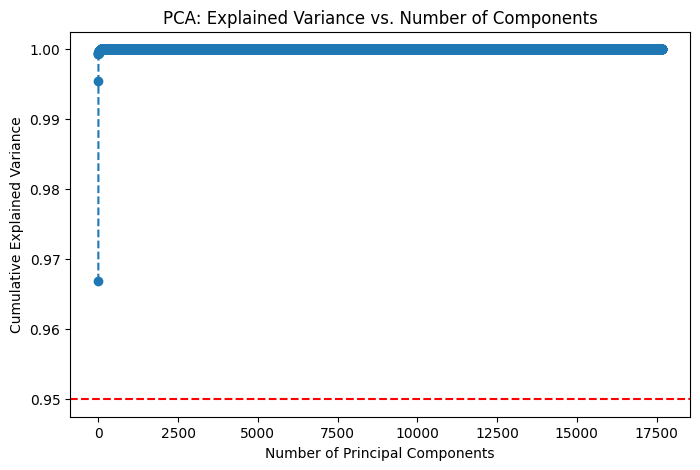

Number of components to retain 95% variance: 1


In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA without specifying n_components to analyze variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.show()

# Find the number of components needed for 95% variance
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")


In [40]:
# Reduce dimensionality using optimal number of components
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_scaled)  # Shape: (num_samples, n_components_95)

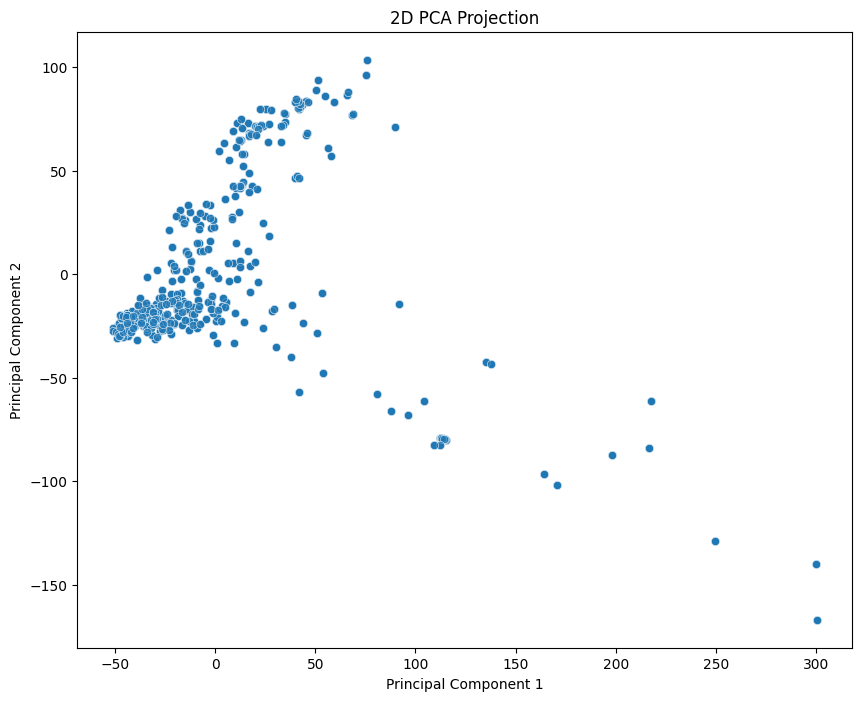

In [60]:
import seaborn as sns

# Visualize 2D PCA projection
X_vis = X_reduced[:, :2]  # First two components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.show()


### 2.2.2 On just the molecule fingerprints and kinase embeddings

In [21]:
# print('Feature names:', feature_names[:2] + ['...'] + feature_names[2047:2060], '+', feature_names[2060:2075] + ['...'] + feature_names[-1:])
feature_names[2060:2073]

['Mutant',
 'Kinase.Group.Other',
 'Kinase.Group.TK',
 'Kinase.Group.TKL',
 'Kinase.Group.Atypical',
 'Kinase.Group.AGC',
 'Kinase.Group.CAMK',
 'Kinase.Group.STE',
 'Kinase.Group.CMGC',
 'Kinase.Group.CK1',
 'Kinase.Group.Pathogen',
 'Kinase.Group.Lipid',
 'ke_0']

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Separate feature groups
X_mol_fp = X[:, :2048]   # molecule fingerprints (2048 features)
X_mol_other = X[:, 2048:2060]  # other molecule features (12 features)
X_kin_other = X[:, 2060:2072]  # kinase features (12 features)
X_kin_emb = X[:, 2072:]  # kinase embeddings (15612 features)


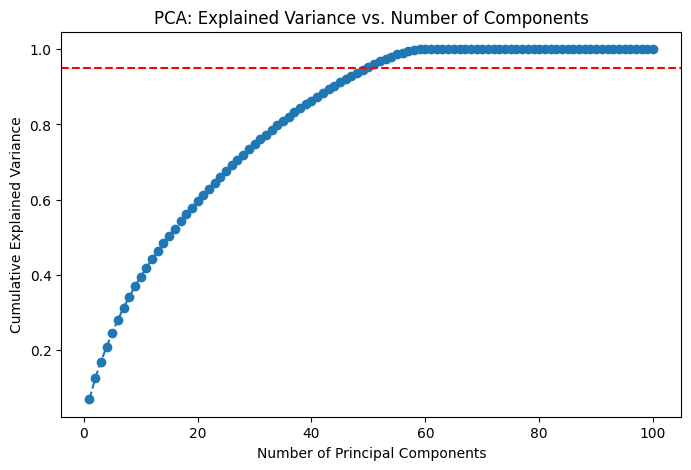

In [23]:

pca_fp = PCA(n_components=100)
X_mol_pca = pca_fp.fit_transform(X_mol_fp)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca_fp.explained_variance_ratio_)

# Plot cumulative variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.show()

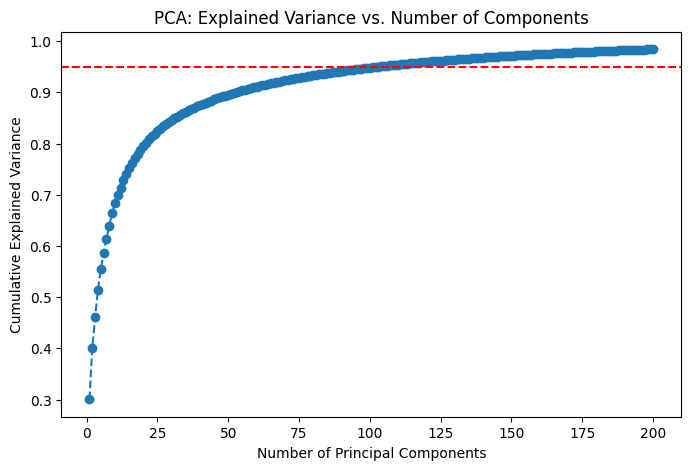

In [85]:
pca_kin = PCA(n_components=200)
X_kin_pca = pca_kin.fit_transform(X_kin_emb)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca_kin.explained_variance_ratio_)

# Plot cumulative variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.show()

It looks like using around the top ~150 PCs should be good enough at describing the kinase embeddings.

In [86]:
# Keep the top 150 kinase PCs
X_kin_emb_PCs = X_kin_pca[:, :150]
X_kin_emb_PCs.shape

(26520, 150)

## 2.3 XGBoost to select the most relevant bits of the molecules' Morgan fingerprints

In [27]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Train an XGBoost model on the full fingerprint set
model = XGBRegressor(n_estimators=2000, random_state=42)
model.fit(X_mol_fp, y)  # X_mol_fp: (num_samples, 2048), y: target values (Kd)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

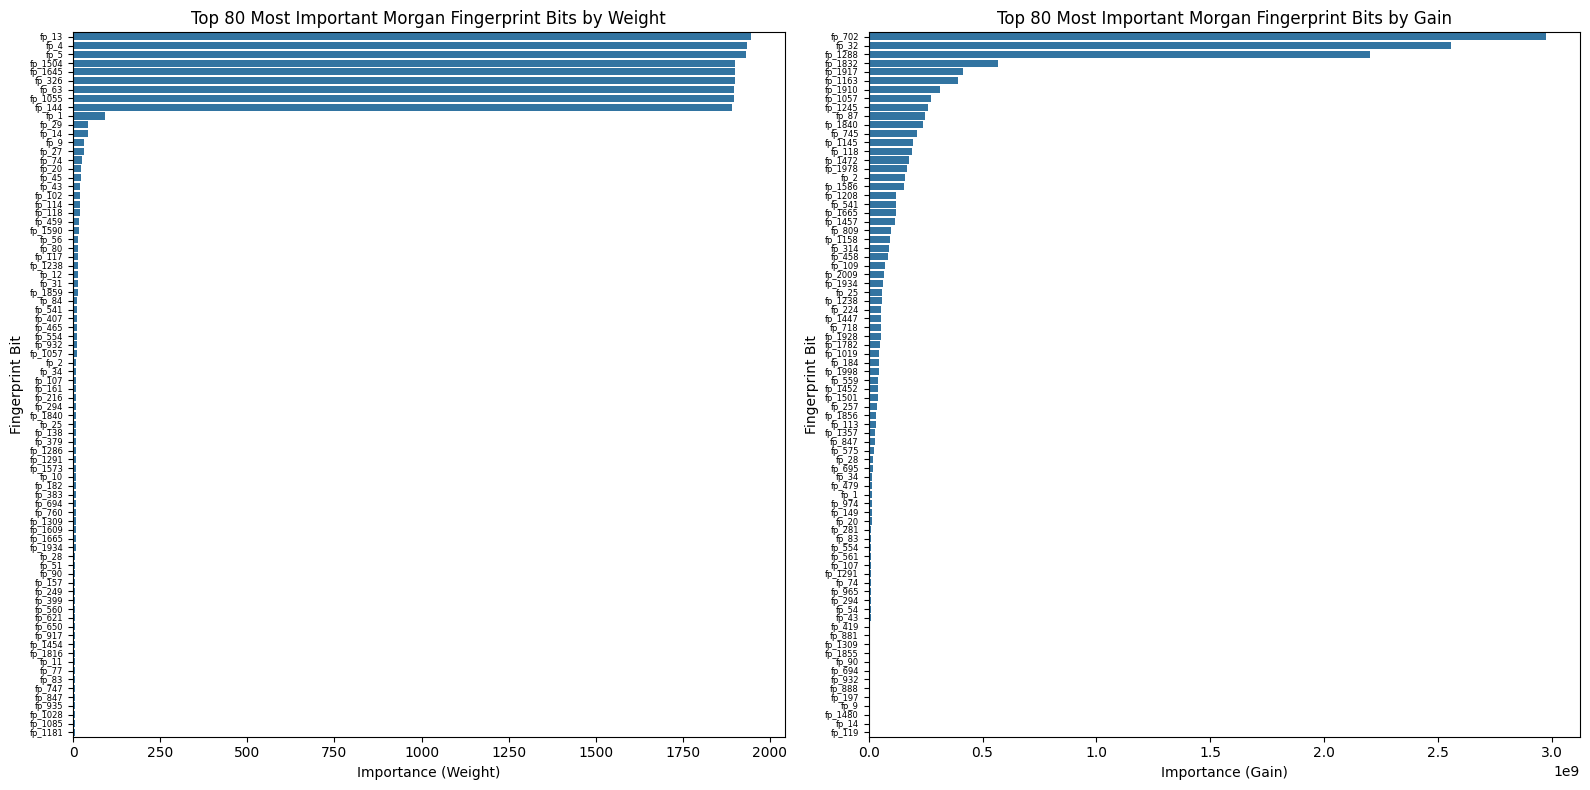

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

K = 80

# Get feature importances by weight and gain
importances_weight = model.get_booster().get_score(importance_type='weight')
importances_gain = model.get_booster().get_score(importance_type='gain')

# Sort the features by importance and extract top K for both weight and gain
sorted_importances_weight = sorted(importances_weight.items(), key=lambda x: x[1], reverse=True)
sorted_importances_gain = sorted(importances_gain.items(), key=lambda x: x[1], reverse=True)
top_K_features_weight = sorted_importances_weight[:K]
top_K_features_gain = sorted_importances_gain[:K]

# Separate the feature indices and their importance values for both weight and gain
feature_indices_weight = [int(feat[0][1:]) for feat in top_K_features_weight]  # Removing 'f' from feature name
feature_importances_weight = [feat[1] for feat in top_K_features_weight]
feature_indices_gain = [int(feat[0][1:]) for feat in top_K_features_gain]  # Removing 'f' from feature name
feature_importances_gain = [feat[1] for feat in top_K_features_gain]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot a bar chart of the top K feature importances by weight
sns.barplot(x=feature_importances_weight, y=[f'fp_{i}' for i in feature_indices_weight], ax=axes[0])
axes[0].set_title(f'Top {K} Most Important Morgan Fingerprint Bits by Weight')
axes[0].set_xlabel('Importance (Weight)')
axes[0].set_ylabel('Fingerprint Bit')
axes[0].tick_params(axis='y', labelsize=6)

# Plot a bar chart of the top K feature importances by gain
sns.barplot(x=feature_importances_gain, y=[f'fp_{i}' for i in feature_indices_gain], ax=axes[1])
axes[1].set_title(f'Top {K} Most Important Morgan Fingerprint Bits by Gain')
axes[1].set_xlabel('Importance (Gain)')
axes[1].set_ylabel('Fingerprint Bit')
axes[1].tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

and only about ~50 fingerprint bits are meaningfull enough to keep.

In [30]:
X_mol_fp_top = X_mol_fp[:, feature_indices_gain[:50]]  # (num_samples, 50)
X_mol_fp_top.shape

(26520, 50)

## Final Data to be Used

In [31]:
X_mol_fp_top.shape, X_mol_other.shape, X_kin_other.shape, X_kin_emb_PCs.shape

((26520, 50), (26520, 12), (26520, 12), (26520, 150))

In total, we are left with 50 + 12 + 12 + 150 features.

In [32]:
feature_names[2045:2075]

['fp_2045',
 'fp_2046',
 'fp_2047',
 'bm_undetermined',
 'bm_type1',
 'bm_type2',
 'logP',
 'mol_weight',
 'rot_bonds',
 'hb_donors',
 'hb_acceptors',
 'TPSA',
 'num_rings',
 'chiral_centers',
 'complexity',
 'Mutant',
 'Kinase.Group.Other',
 'Kinase.Group.TK',
 'Kinase.Group.TKL',
 'Kinase.Group.Atypical',
 'Kinase.Group.AGC',
 'Kinase.Group.CAMK',
 'Kinase.Group.STE',
 'Kinase.Group.CMGC',
 'Kinase.Group.CK1',
 'Kinase.Group.Pathogen',
 'Kinase.Group.Lipid',
 'ke_0',
 'ke_1',
 'ke_2']

In [33]:
# Combine the reduced features into a final feature matrix
X_final = np.hstack([X_mol_fp_top, X_mol_other, X_kin_other, X_kin_emb_PCs])
feature_names_final = [f'fp_{i}' for i in feature_indices_gain[:50]] + feature_names[2048:2060] + feature_names[2060:2072] + [f'ke_PCA{i}' for i in range(150)]
print(f'Final feature matrix shape: {X_final.shape}')  # Should be (num_samples, 312)
print('Final feature names:', feature_names_final[:2] + ['...'] + feature_names_final[49:62], '+', feature_names_final[62:76] + ['...'] + feature_names_final[-1:])

Final feature matrix shape: (26520, 224)
Final feature names: ['fp_702', 'fp_32', '...', 'fp_695', 'bm_undetermined', 'bm_type1', 'bm_type2', 'logP', 'mol_weight', 'rot_bonds', 'hb_donors', 'hb_acceptors', 'TPSA', 'num_rings', 'chiral_centers', 'complexity'] + ['Mutant', 'Kinase.Group.Other', 'Kinase.Group.TK', 'Kinase.Group.TKL', 'Kinase.Group.Atypical', 'Kinase.Group.AGC', 'Kinase.Group.CAMK', 'Kinase.Group.STE', 'Kinase.Group.CMGC', 'Kinase.Group.CK1', 'Kinase.Group.Pathogen', 'Kinase.Group.Lipid', 'ke_PCA0', 'ke_PCA1', '...', 'ke_PCA149']


In [38]:
X_final.mean(), X_final.std(), X_final.min(), X_final.max()

(np.float64(0.042137672376643016),
 np.float64(0.4112659043704497),
 np.float64(-4.786571114721619),
 np.float64(4.708596232216612))

# 3. Building a Model for the Main Regression Task

Load test data

In [49]:
X_mol_test = get_molecule_features('Table-2_test.csv')
X_mol_test.head()

[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator
[12:24:47] DEPRECATION WARNING: please use MorganGenerator


,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,bm_type2,logP,mol_weight,rot_bonds,hb_donors,hb_acceptors,TPSA,num_rings,chiral_centers,complexity
0,0,0,0,0,0,0,0,0,0,0,...,1,2.1869,569.448,5,9,7,234.46,4,0,1234.094104
1,0,0,0,0,0,1,0,0,0,0,...,0,3.6159,539.636,7,2,7,94.22,5,0,1404.619905
2,0,0,0,0,0,0,0,0,0,0,...,0,5.0378,478.664,6,2,3,50.36,3,0,774.865587
3,0,1,0,0,0,0,0,0,0,0,...,0,5.0921,543.615,7,1,7,76.62,5,1,1404.016811
4,0,0,0,0,0,0,0,0,0,0,...,0,2.9802,348.362,2,1,7,84.51,5,0,1073.794939


In [87]:
from sklearn.preprocessing import StandardScaler
X_mol_test = get_molecule_features('Table-2_test.csv')
X_mol_bin = X_mol_test.iloc[:, :2051]   # binary features (2048 from fingerprints + 3 from binding mode)
X_mol_cont = X_mol_test.iloc[:, 2051:]  # continuous features
scaler = StandardScaler()
X_mol_cont = pd.DataFrame(scaler.fit_transform(X_mol_cont), columns=X_mol_cont.columns)
X_mol_test = pd.concat([X_mol_bin, X_mol_cont], axis=1)
X_mol_test.head()

[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator
[12:39:04] DEPRECATION WARNING: please use MorganGenerator


,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,bm_type2,logP,mol_weight,rot_bonds,hb_donors,hb_acceptors,TPSA,num_rings,chiral_centers,complexity
0,0,0,0,0,0,0,0,0,0,0,...,1,-1.236012,1.490134,-0.237915,2.789280,0.547723,2.847416,-0.109764,-0.447214,0.588433
1,0,0,0,0,0,1,0,0,0,0,...,0,-0.163203,1.070438,0.713746,-0.334714,0.547723,-0.109044,1.207407,-0.447214,1.577182
2,0,0,0,0,0,0,0,0,0,0,...,0,0.904274,0.212068,0.237915,-0.334714,-1.643168,-1.033675,-1.426935,-0.447214,-2.074282
3,0,1,0,0,0,0,0,0,0,0,...,0,0.945040,1.126455,0.713746,-0.780998,0.547723,-0.480077,1.207407,2.236068,1.573685
4,0,0,0,0,0,0,0,0,0,0,...,0,-0.640449,-1.622337,-1.665408,-0.780998,0.547723,-0.313744,1.207407,-0.447214,-0.341019


In [88]:
X_mol.shape, X_mol_test.shape

((60, 2060), (12, 2060))

In [163]:
import numpy as np
import pandas as pd

X_kin = pd.read_csv('data/kinase_features.csv')

# Add kinase embeddings to the kinase features
X_kin = pd.concat([X_kin.drop(columns=['unique_accession']), kinase_embeddings_df], axis=1)  # (N_kin, D_kin + D_kin_emb)

N_mol, D_mol = X_mol_test.shape
N_kin, D_kin = X_kin.shape

# Repeat molecule features across kinases (for each molecule-kinase pair)
X_mol_test_expanded = np.repeat(X_mol_test, repeats=N_kin, axis=0)  # (N_mol*N_kin, D_m)

# Tile kinase features across all molecules
X_kin_expanded = np.tile(X_kin, (N_mol, 1))  # (N_mol*N_kin, D_k)

# Concatenate molecule and kinase features
X_test = np.hstack([X_mol_test_expanded, X_kin_expanded])  # (N_mol*N_kin, D_m + D_k)

# Create df with all features, making the index the molecule ID and the kinase ID

In [134]:
affinities_df_test = pd.read_excel('Table-3_test.xlsx', index_col=2).iloc[:, 2:]
affinities_df_test

,AMG-706,BIBF-1120 (derivative),CI-1040,GSK-461364A,PI-103,SKI-606,Sorafenib,SU-14813,Sunitinib,TG-100-115,VX-680/MK-0457,VX-745
Kinase,,,,,,,,,,,,
AAK1,10001.0,63.0,10001,10001.0,10001.0,2300.000,10001.0,66.0,11.0,870.0,290.0,10001.0
ABL1(E255K)-phosphorylated,10001.0,63.0,10001,10001.0,10001.0,0.047,3400.0,310.0,180.0,10001.0,3.0,10001.0
ABL1(F317I)-nonphosphorylated,4000.0,6900.0,10001,10001.0,10001.0,0.630,1700.0,3400.0,3600.0,10001.0,7200.0,10001.0
ABL1(F317I)-phosphorylated,10001.0,2600.0,10001,10001.0,10001.0,0.180,4900.0,2400.0,890.0,10001.0,2100.0,10001.0
ABL1(F317L)-nonphosphorylated,910.0,2300.0,10001,10001.0,10001.0,0.110,770.0,3300.0,730.0,10001.0,480.0,10001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
YES,5000.0,80.0,10001,10001.0,10001.0,4.000,10001.0,260.0,120.0,10001.0,470.0,1600.0
YSK1,10001.0,10001.0,10001,10001.0,10001.0,900.000,10001.0,360.0,290.0,10001.0,4800.0,10001.0
YSK4,200.0,5.2,10001,2800.0,930.0,16.000,99.0,12.0,17.0,4000.0,51.0,10001.0


In [135]:
X.shape, X_test.shape

((26520, 17671), (5304, 17671))

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Separate feature groups
X_test_mol_fp = X_test[:, :2048]   # molecule fingerprints (2048 features)
X_test_mol_other = X_test[:, 2048:2060]  # other molecule features (12 features)
X_test_kin_other = X_test[:, 2060:2072]  # kinase features (12 features)
X_test_kin_emb = X_test[:, 2072:]  # kinase embeddings (15612 features)


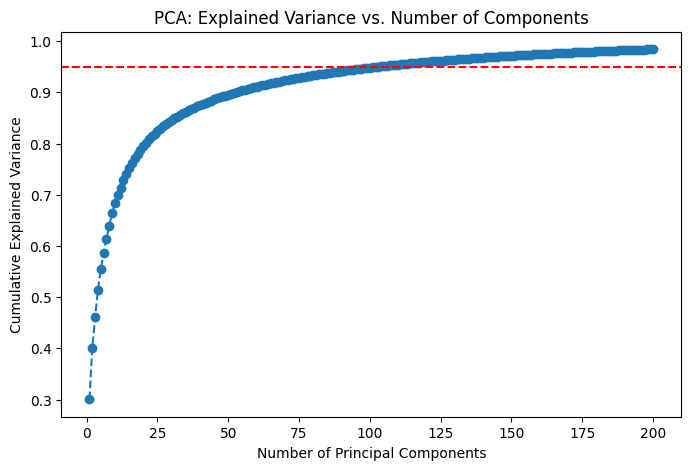

In [137]:
pca_kin = PCA(n_components=200)
X_test_kin_pca = pca_kin.fit_transform(X_test_kin_emb)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca_kin.explained_variance_ratio_)

# Plot cumulative variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.show()

In [138]:
# Keep the top 150 kinase PCs
X_test_kin_emb_PCs = X_test_kin_pca[:, :150]
X_test_kin_emb_PCs.shape

(5304, 150)

In [139]:
X_test_mol_fp_top = X_test_mol_fp[:, feature_indices_gain[:50]]  # (num_samples, 50)
X_test_mol_fp_top.shape

(5304, 50)

In [140]:
X_test.shape, X_test_mol_fp_top.shape, X_test_mol_other.shape, X_test_kin_other.shape, X_test_kin_emb_PCs.shape

((5304, 17671), (5304, 50), (5304, 12), (5304, 12), (5304, 150))

In [141]:
# Combine the reduced features into a final feature matrix
X_test_final = np.hstack([X_test_mol_fp_top, X_test_mol_other, X_test_kin_other, X_test_kin_emb_PCs])
feature_names_final_test = [f'fp_{i}' for i in feature_indices_gain[:50]] + feature_names[2048:2060] + feature_names[2060:2072] + [f'ke_PCA{i}' for i in range(150)]
print(f'Final test feature matrix shape: {X_test_final.shape}')  # Should be (num_samples, 312)
print('Final test feature names:', feature_names_final_test[:2] + ['...'] + feature_names_final_test[49:62], '+', feature_names_final_test[62:76] + ['...'] + feature_names_final_test[-1:])

Final test feature matrix shape: (5304, 224)
Final test feature names: ['fp_702', 'fp_32', '...', 'fp_695', 'bm_undetermined', 'bm_type1', 'bm_type2', 'logP', 'mol_weight', 'rot_bonds', 'hb_donors', 'hb_acceptors', 'TPSA', 'num_rings', 'chiral_centers', 'complexity'] + ['Mutant', 'Kinase.Group.Other', 'Kinase.Group.TK', 'Kinase.Group.TKL', 'Kinase.Group.Atypical', 'Kinase.Group.AGC', 'Kinase.Group.CAMK', 'Kinase.Group.STE', 'Kinase.Group.CMGC', 'Kinase.Group.CK1', 'Kinase.Group.Pathogen', 'Kinase.Group.Lipid', 'ke_PCA0', 'ke_PCA1', '...', 'ke_PCA149']


In [142]:
X_test_final.mean(), X_test_final.std(), X_test_final.min(), X_test_final.max()

(np.float64(0.033655529519500134),
 np.float64(0.4016221991228783),
 np.float64(-4.7865711147216325),
 np.float64(4.708596232216619))

In [143]:
Kds_df = pd.read_excel('Table-3_test.xlsx')
# Keep only the Kd values (and kinase for index)
Kds_df = Kds_df.set_index('Kinase')
Kds_df = Kds_df.iloc[:, 2:]  # Kd values
Kds_df

y_test = Kds_df.values.flatten()
y_test_final = np.log10(y_test)

## 3.1 XGBoost

In [76]:
X.shape, X_test.shape

((5304, 17671), (5304, 2073))

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_final, y_final)
xgb_preds = xgb_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
print("XGBoost MAE:", mean_absolute_error(y_test_log, xgb_preds))

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
xg_model = xgb.XGBRegressor(n_estimators=2000, objective='reg:absoluteerror', device='cuda', random_state=42)

# Hyperparameters grid to search
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'device': ['cuda']
}

# Set up GridSearchCV with 5-fold CV
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the grid search
grid_search.fit(X, y)

# Print the best parameters and best score (MSE)
print("Best Parameters:", grid_search.best_params_)
print("Best MAE Score:", -grid_search.best_score_)


## 3.2 Neural Network

In [164]:
X_final.shape, y_final.shape

((26520, 224), (26520,))

Epoch [1/50] - Train Loss: 1.1343, Val Loss: 0.5981
Epoch [2/50] - Train Loss: 0.8064, Val Loss: 0.5721
Epoch [3/50] - Train Loss: 0.7471, Val Loss: 0.5369
Epoch [4/50] - Train Loss: 0.7000, Val Loss: 0.5261
Epoch [5/50] - Train Loss: 0.6673, Val Loss: 0.5294
Epoch [6/50] - Train Loss: 0.6390, Val Loss: 0.4786
Epoch [7/50] - Train Loss: 0.6099, Val Loss: 0.5107
Epoch [8/50] - Train Loss: 0.5880, Val Loss: 0.4746
Epoch [9/50] - Train Loss: 0.5669, Val Loss: 0.4531
Epoch [10/50] - Train Loss: 0.5468, Val Loss: 0.4758
Epoch [11/50] - Train Loss: 0.5278, Val Loss: 0.4517
Epoch [12/50] - Train Loss: 0.5105, Val Loss: 0.4390
Epoch [13/50] - Train Loss: 0.4954, Val Loss: 0.4223
Epoch [14/50] - Train Loss: 0.4802, Val Loss: 0.4315
Epoch [15/50] - Train Loss: 0.4655, Val Loss: 0.4224
Epoch [16/50] - Train Loss: 0.4524, Val Loss: 0.4187
Epoch [17/50] - Train Loss: 0.4423, Val Loss: 0.4121
Epoch [18/50] - Train Loss: 0.4385, Val Loss: 0.4146
Epoch [19/50] - Train Loss: 0.4385, Val Loss: 0.4132
Ep

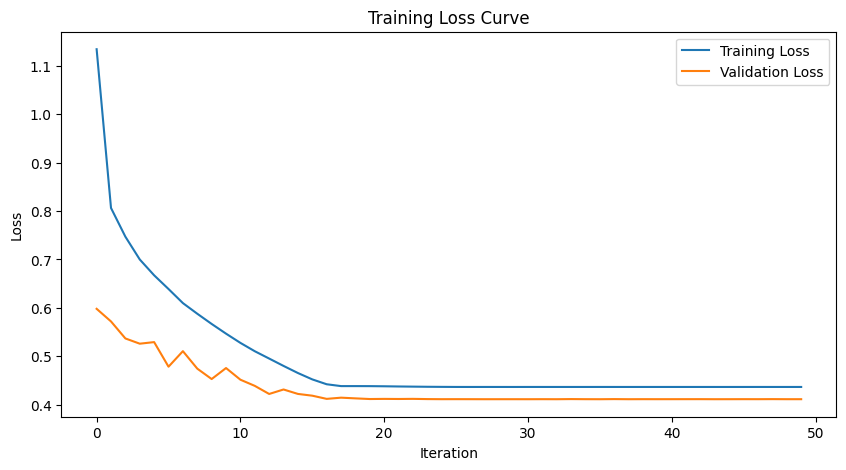

In [166]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the Neural Network architecture
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)  # Output layer with 1 neuron for regression

        # Activation function
        self.relu = nn.ReLU()
        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize device (CUDA if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_final, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_final, dtype=torch.float32).to(device)
# Split the data into training and validation sets
train_size = int(0.8 * len(X_tensor))
X_train, X_val = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_val = y_tensor[:train_size], y_tensor[train_size:]

# Create model and move it to GPU
model = RegressionNN(input_dim=224).to(device)

def train_model(model, X_train, y_train, X_val, y_val, learning_rate=0.001, epochs=100, batch_size=32):
    """
    Trains the PyTorch model with the given hyperparameters.

    Parameters:
    - model: PyTorch neural network
    - X_train, y_train: Training data
    - X_val, y_val: Validation data
    - learning_rate: Learning rate for optimizer
    - epochs: Number of training epochs
    - batch_size: Batch size

    Returns:
    - train_losses: List of training losses per epoch
    - val_losses: List of validation losses per epoch
    """

    # Define Loss Function and Optimizer
    criterion = nn.L1Loss()  # MAE Loss (can change to MSELoss if needed)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Create PyTorch DataLoaders
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Store loss history
    train_losses = []
    val_losses = []

    # Training Loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            # Backpropagation
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Compute average training loss for the epoch
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation Phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item()

        # Compute average validation loss for the epoch
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # Print progress
        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val, learning_rate=0.001, epochs=50, batch_size=32)


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


In [174]:
# Save the trained model
torch.save(model.state_dict(), 'regression_model.pth')

In [171]:
def test_model(model, X_test, y_test, threshold=3000):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Convert test data to PyTorch tensors
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
        
        # Make predictions
        y_pred = model(X_test_tensor).squeeze()
        
        # Calculate Mean Absolute Error (MAE) for Kds
        mae = mean_absolute_error(y_test_tensor.cpu(), y_pred.cpu())
        
        # Calculate selectivity scores
        y_pred_np = y_pred.cpu().numpy()
        y_test_np = y_test_tensor.cpu().numpy()
        
        # Selectivity: number of Kd < threshold divided by number of kinases (442)
        selectivity_pred = np.sum(y_pred_np < np.log10(threshold)) / 442
        selectivity_true = np.sum(y_test_np < np.log10(threshold)) / 442
        
        # Calculate accuracy
        accuracy = np.mean((y_pred_np < np.log10(threshold)) == (y_test_np < np.log10(threshold)))
        
        print(f"Mean Absolute Error (MAE) for Kds: {mae:.4f}")
        print(f"Selectivity Score (Predicted): {selectivity_pred:.4f}")
        print(f"Selectivity Score (True): {selectivity_true:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        
        return mae, selectivity_pred, selectivity_true, accuracy


In [172]:
X_test.shape, y_test.shape, X_test_final.shape, y_test_final.shape

((5304, 17671), (5304,), (5304, 224), (5304,))

In [175]:
# Load the trained model
model = RegressionNN(input_dim=224).to(device)
model.load_state_dict(torch.load('regression_model.pth'))

mae, selectivity_pred, selectivity_true, acc = test_model(model, X_test_final, y_test_final)

Mean Absolute Error (MAE) for Kds: 0.4745
Selectivity Score (Predicted): 0.0000
Selectivity Score (True): 3.1742
Accuracy: 0.7355
